<a href="https://colab.research.google.com/github/ZXEcoder/machine_learning_fundas/blob/main/Copy_of_01_pytorch_workfllow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pytorch workflow
 

In [1]:
import torch 
from torch import nn #nn contains  all of pytorch's building blocks for neural network
import matplotlib.pyplot as plt
#checking version of torch
torch.__version__


'2.0.1+cu118'

## data preparing and loading

In [2]:
weight = 0.7
bias = 0.3
#create
start=0
end=1
step=0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
len(X),len(y)

(50, 50)

 ### splitting data into training and test sets(one of the most common )

In [4]:
# create a train/test split
train_split = int(0.8*len(X))
X_train, y_train =X[:train_split],y[:train_split]
X_test, y_test =X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions( train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
                     
  """plot trainning data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue 
  plt.scatter(train_data,train_labels, c="b",s=4, label="Training Data")
  #plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4, label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions, c= "r",s=4, label="Predictions")
  plt.legend(prop={"size":14});

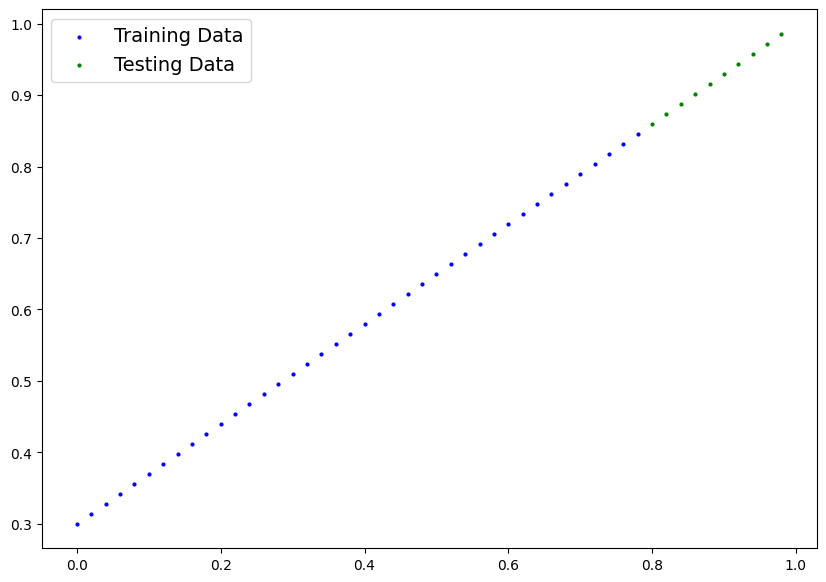

In [6]:
plot_predictions();

## Build 1st pytorch model

In [7]:
#create a linear regression model class
class LinearRegressionModel(nn.Module): #<- almost everything in pytorch
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
                                              
                                            
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float),requires_grad=True)
                                               

  #forward method to define the computation in the module
    def forward(self, x: torch.Tensor) -> torch.tensor:
        return self.weights * x + self.bias #this is linear eegression formula
                                    

###**Torch model building essentials**
* torch.nn -> contains all of the building for compuational graphs(a neural network can be considered a computaional graph)

* torch.nn.parameter-> what parameter should our model try and learn, often a pytorch layer from torch.nn will set for this for us

* torch.nn.module-> the base class for all module, if you subclass  it, you should overwrite forward()

* torch.optim-> this where the optimizers in pytorch live, they will help with gradient descent

#help with gradient descent

* def forward()-> all nn module subclasses require yuou to overwrite forward() this method what happens in a forward computation

### checking the contents of our pytorch module
Now we've created  a model, let's see what's inside..

so we can check our model parameters or what's inside our model using `.parameter()`

In [8]:
# create a random seed 
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegressionModel()
# check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making prediction using `torch.inference_mode()`
To check model's predictive power , let's see how well it predicts `y_test` based on `x_test`

when we pass data through our model, it's going to run it through the forward method

In [11]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)
y_preds  

# with torch.no_grad():
#     y_preds = model_0(X_test) 

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [12]:
y_test


tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

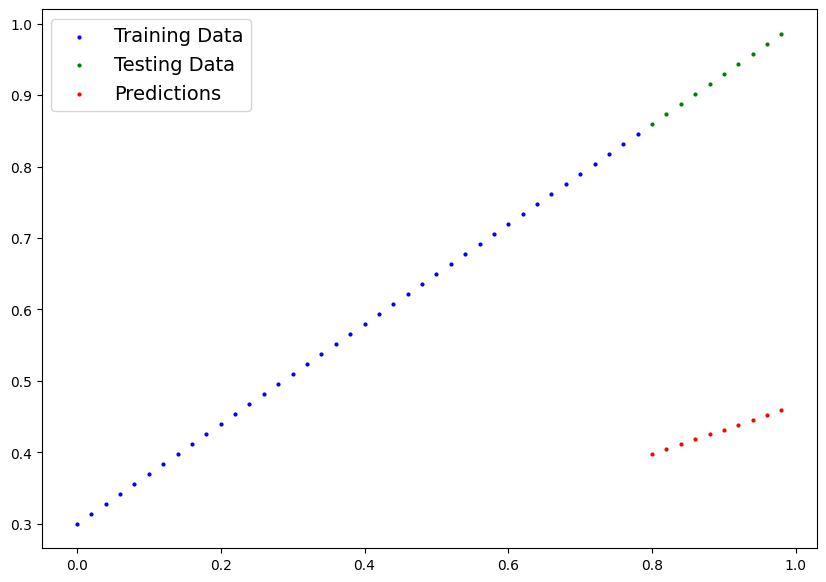

In [13]:
plot_predictions(predictions=y_preds)

### Train model


In [14]:
# one way to measure how poor is your model is using loss function or cost function or criterion 
#setup a loss function

loss_fn = nn.L1Loss()

#setup an omtimizer (stochastic gradient decrent)
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)#lr -> learning rate



In [15]:
from torch.autograd import grad


### Building a training loop(and a testing loop) in pytorch
A couple of things we need in a training loop:
0. loop through data
1. forward pass
2. calculate the loss(compare forward pass predictions to ground truth labels)
3. optimizer zero grad
4. loss backward - move backwards through the network to calculate the gradient 
   off each of the parameters of our model with respect to the loss (**backpropagation**)
5. optimizer step- use the optimizer to adjust our models parameters totely and
  improve loss(**gradient descent**)

In [16]:
torch.manual_seed(42)
# an epoch is one loop through the data..
epochs = 200
epoch_count=[]
loss_values=[]
test_loss_values=[]
### Training
# 0.loop through data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train()#train the model which requires the gradient 

  #1.0 forward pass
  y_pred = model_0(X_train)

  #2. calculate the loss
  loss = loss_fn(y_pred, y_train)
  print(f"loss: {loss}")

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. backpropagation on the loss
  loss.backward()

  #5. step the optimizer (perform gradient descent)
  optimizer.step()# by default the changes will accumulate through the loop so we have to zero them above
 
 ### TESTING
  model_0.eval()#turns off different settings in the model not needed for evaluation
  with torch.inference_mode():#turns off gradient tracking and couple of more things
  # with torch.no_grad():
  #1. Do the forward pass

    test_pred = model_0(X_test)
    #2. calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")  

  print(model_0.state_dict())  


loss: 0.31288138031959534
epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
loss: 0.3013603389263153
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
loss: 0.28983935713768005
OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
loss: 0.2783183455467224
OrderedDict([('weights', tensor([0.3523])), ('bias', tensor([0.1688]))])
loss: 0.26679736375808716
OrderedDict([('weights', tensor([0.3562])), ('bias', tensor([0.1788]))])
loss: 0.2552763521671295
OrderedDict([('weights', tensor([0.3601])), ('bias', tensor([0.1888]))])
loss: 0.24375534057617188
OrderedDict([('weights', tensor([0.3640])), ('bias', tensor([0.1988]))])
loss: 0.23223432898521423
OrderedDict([('weights', tensor([0.3679])), ('bias', tensor([0.2088]))])
loss: 0.22071333229541779
OrderedDict([('weights', tensor([0.3718])), ('bias', tensor([0.2188]))])
loss: 0.20919232070446014
OrderedDict([('w

In [17]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()),np.array(torch.tensor(test_loss_values).cpu().numpy())

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 array([0.48106518, 0.3463552 , 0.2172966 , 0.14464018, 0.11360953,
        0.09919948, 0.08886633, 0.08059376, 0.07232123, 0.06473556,
        0.05646304, 0.0481905 , 0.04060482, 0.03233228, 0.02405975,
        0.01647409, 0.00820156, 0.00502309, 0.00502309, 0.00502309],
       dtype=float32))

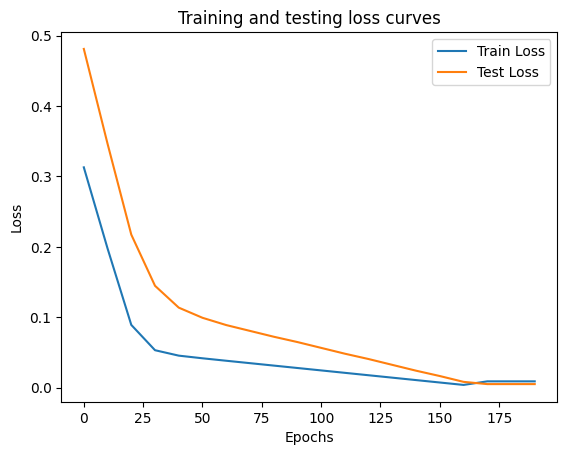

In [18]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()), label ="Train Loss")
plt.plot(epoch_count, test_loss_values, label ="Test Loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [19]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [20]:
weight, bias

(0.7, 0.3)

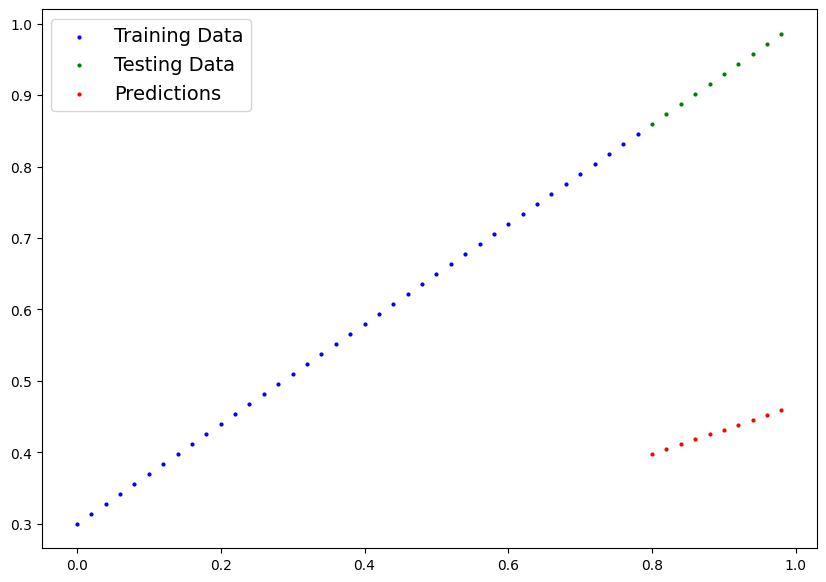

In [21]:
plot_predictions(predictions=y_preds)

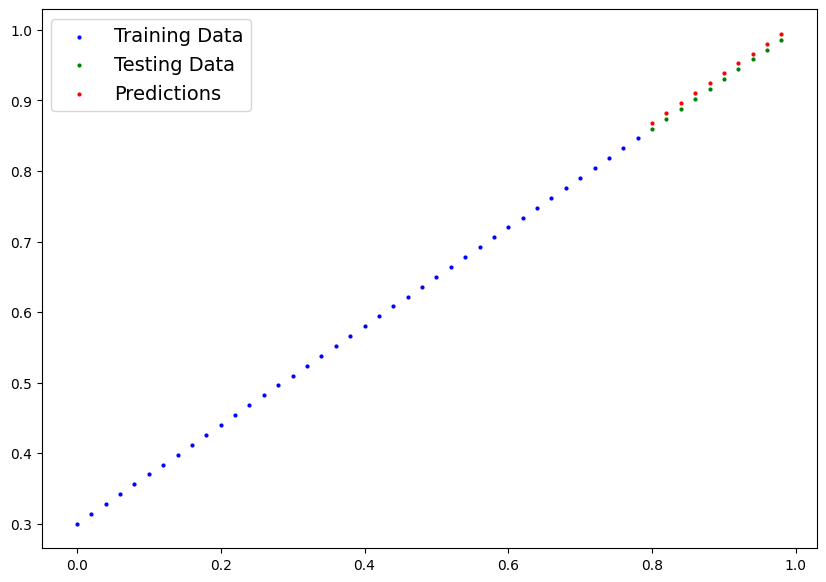

In [22]:
plot_predictions(predictions=y_preds_new)

### Saving a model in pytorch

1. `torch.save()`
2. `torch.load()`
3. `torch.nn.module.load_state_dict()`

In [23]:
# Saving our pytorch mode1
from pathlib import Path

# 1. create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create model save path
MODEL_NAME= "01_pytorch_workfllow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH


# save the model
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workfllow_model_0.pth


  ## loading pytorch model

In [24]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [32]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [33]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [34]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds  

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [35]:
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])